### Student Information
Name: 林育丞

Student ID: 112062595

GitHub ID: ryonaya

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### Pre-setup for Exercises

In [31]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

import seaborn as sns
import plotly.graph_objs as go
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


### Exercise 2 (take home):

In [5]:
X.loc[:10, [t for t in X.columns]]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### Exercise 5 (take home)

Answer here <br>
```markdown
np.nan, None, missing column are considered as null values 
'NaN', 'None' are valid entries but displayed like np.nan and None
'' empty string is valid and display nothing

### Exercise 6 (take home):

Answer here
```markdown
The entries are randomly drawn from the original dataset
It's a subset of the original dataset
The index is not ordered

### Exercise 8 (take home):

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

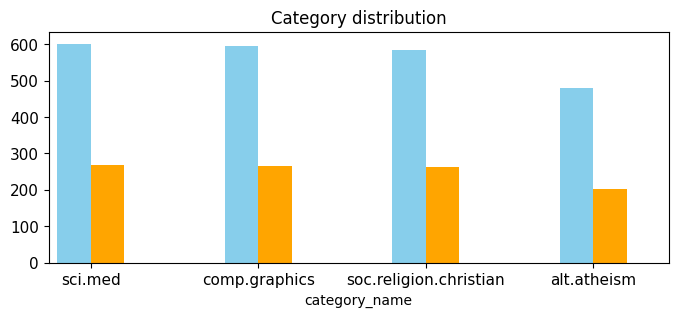

In [7]:
# Answer here
# comparison of X and X_sample in the same plot, using different colors
fig, ax = plt.subplots()
X_sample = X.sample(n=1000) #random state
upper_bound = X.category_name.value_counts().max() + 35

X.category_name.value_counts().plot(kind = 'bar', 
                                    color='skyblue', 
                                    ax = ax, 
                                    width = 0.2, 
                                    position = 1, 
                                    title = 'Category distribution', 
                                    ylim = [0, upper_bound], 
                                    rot = 0, fontsize = 11, figsize = (8,3))
X_sample.category_name.value_counts().plot(kind = 'bar', 
                                           color='orange', 
                                           ax = ax, 
                                           width = 0.2, 
                                           position = 0, 
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 11, figsize = (8,3))


### Exercise 10 (take home):

In [9]:
# find the index of the second 1 in the fifth record
for i in range(1, 100):
    # print(f'{i}: {X_counts[4, i]}, means {count_vect.get_feature_names_out()[i]}')
    if X_counts[4, i] == 1:
        print(count_vect.get_feature_names_out()[i])
        break

01


### Exercise 11 (take home):

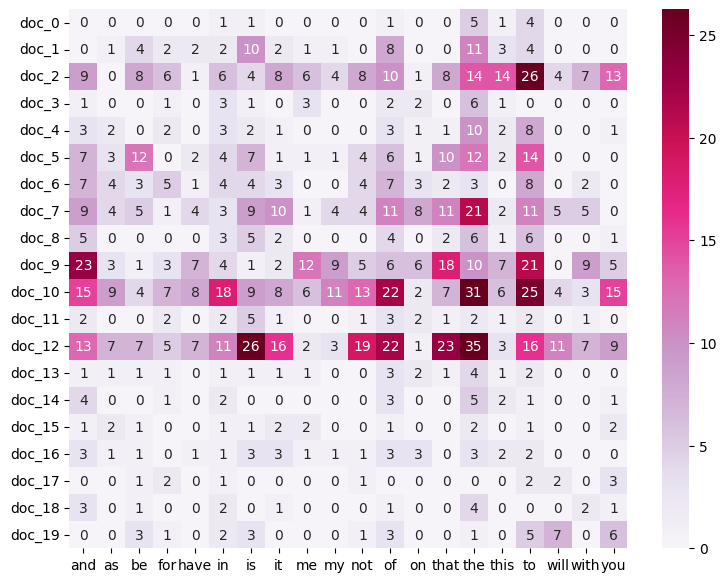

In [20]:
my_count_vect = CountVectorizer(max_features = 20)
my_X_counts = my_count_vect.fit_transform(X.text[0:20])
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# first twenty features only
my_plot_x = [str(i) for i in my_count_vect.get_feature_names_out()]
my_plot_z = my_X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

# print top 20 terms
# print(my_plot_x)

df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = plot_y)
top_freq_value = df_todraw.values.max() * 0.75
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=top_freq_value, annot=True)

### Exercise 12 (take home):

In [26]:
trace = go.Histogram(x = count_vect.get_feature_names_out()[:300], y = term_frequencies[:300])
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 13 (take home):

[Text(0, 0, 'the'),
 Text(1, 0, 'of'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'is'),
 Text(5, 0, 'in'),
 Text(6, 0, 'that'),
 Text(7, 0, 'it'),
 Text(8, 0, 'you'),
 Text(9, 0, 'for'),
 Text(10, 0, 'not'),
 Text(11, 0, 'this'),
 Text(12, 0, 'be'),
 Text(13, 0, 'from'),
 Text(14, 0, 'are'),
 Text(15, 0, 'edu'),
 Text(16, 0, 'have'),
 Text(17, 0, 'as'),
 Text(18, 0, 'on'),
 Text(19, 0, 'with'),
 Text(20, 0, 'but'),
 Text(21, 0, 'or'),
 Text(22, 0, 'if'),
 Text(23, 0, 'was'),
 Text(24, 0, 'can'),
 Text(25, 0, 'we'),
 Text(26, 0, 'there'),
 Text(27, 0, 'by'),
 Text(28, 0, 'what'),
 Text(29, 0, 'subject'),
 Text(30, 0, 'they'),
 Text(31, 0, 'an'),
 Text(32, 0, 'lines'),
 Text(33, 0, 'one'),
 Text(34, 0, 'he'),
 Text(35, 0, 'god'),
 Text(36, 0, 'do'),
 Text(37, 0, 'organization'),
 Text(38, 0, 'at'),
 Text(39, 0, 're'),
 Text(40, 0, 'com'),
 Text(41, 0, 'about'),
 Text(42, 0, 'my'),
 Text(43, 0, 'all'),
 Text(44, 0, 'would'),
 Text(45, 0, 'will'),
 Text(46, 0, 'so'),
 Text(47, 0, 

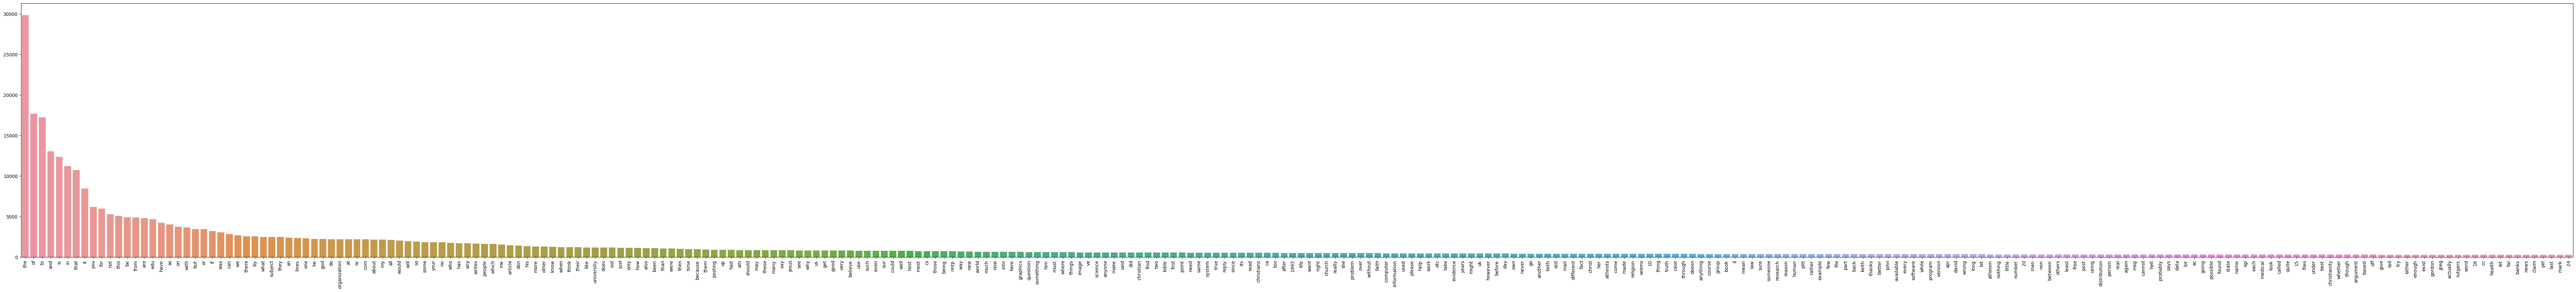

In [29]:
x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

### Exercise 14 (take home):

In [30]:
x = [x[0] for x in sorted_paired_values[:30]]
y = [y[1] for y in sorted_paired_values[:30]]

trace = go.Bar(x = x, y = y)
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 15 (take home):

[Text(0, 0, 'the'),
 Text(1, 0, 'of'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'is'),
 Text(5, 0, 'in'),
 Text(6, 0, 'that'),
 Text(7, 0, 'it'),
 Text(8, 0, 'you'),
 Text(9, 0, 'for'),
 Text(10, 0, 'not'),
 Text(11, 0, 'this'),
 Text(12, 0, 'be'),
 Text(13, 0, 'from'),
 Text(14, 0, 'are'),
 Text(15, 0, 'edu'),
 Text(16, 0, 'have'),
 Text(17, 0, 'as'),
 Text(18, 0, 'on'),
 Text(19, 0, 'with'),
 Text(20, 0, 'but'),
 Text(21, 0, 'or'),
 Text(22, 0, 'if'),
 Text(23, 0, 'was'),
 Text(24, 0, 'can'),
 Text(25, 0, 'we'),
 Text(26, 0, 'there'),
 Text(27, 0, 'by'),
 Text(28, 0, 'what'),
 Text(29, 0, 'subject'),
 Text(30, 0, 'they'),
 Text(31, 0, 'an'),
 Text(32, 0, 'lines'),
 Text(33, 0, 'one'),
 Text(34, 0, 'he'),
 Text(35, 0, 'god'),
 Text(36, 0, 'do'),
 Text(37, 0, 'organization'),
 Text(38, 0, 'at'),
 Text(39, 0, 're'),
 Text(40, 0, 'com'),
 Text(41, 0, 'about'),
 Text(42, 0, 'my'),
 Text(43, 0, 'all'),
 Text(44, 0, 'would'),
 Text(45, 0, 'will'),
 Text(46, 0, 'so'),
 Text(47, 0, 

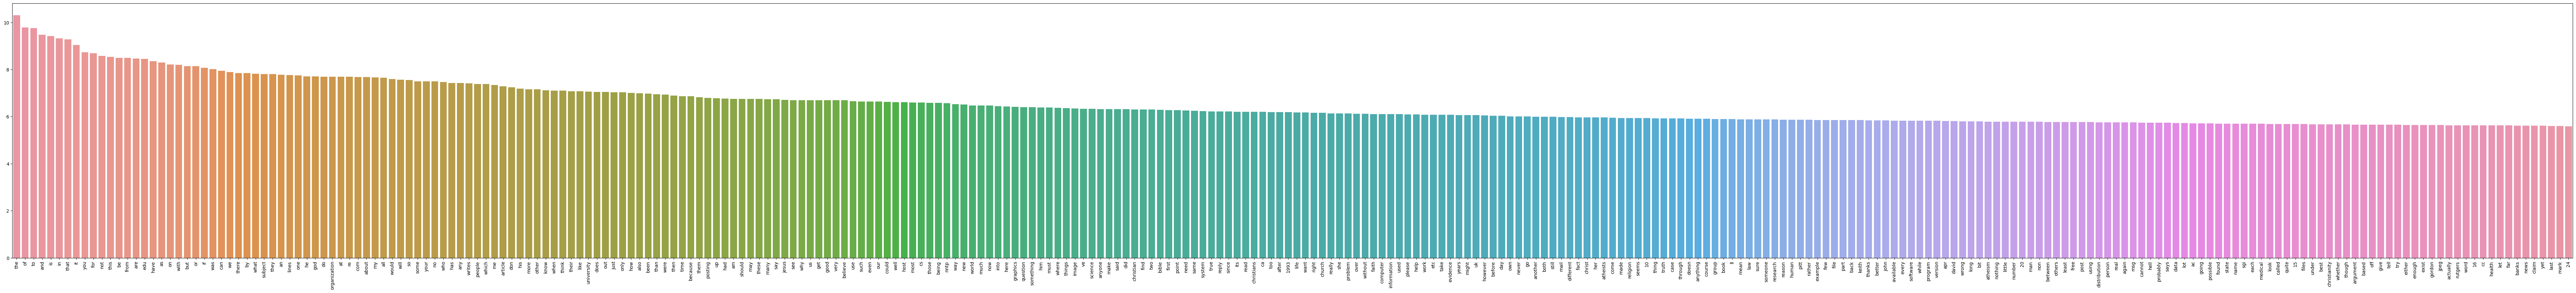

In [32]:
# The plot is way more smoothed out, the values are not as extreme as before

# The log operation can be used to scale down the differences between the values, 
# making it easier to compare them if the distribution is too skewed.

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies_log))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)